In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Your Roll Number,Your Section,CLA,Mid,Lab Internal,Therory total,Attendance,Performance
0,19110010001,CSE A,7,12,42,38,90 to 95%,Good
1,19110010002,CSE A,6,10,35,32,96 to 100%,Average
2,19110010003,CSE A,6,13,38,38,90 to 95%,Good
3,19110010004,CSE A,7,11,36,36,96 to 100%,Good
4,19110010005,CSE D,6,9,49,30,96 to 100%,Poor


In [4]:
X = df.iloc[:,2 :-2].values
y = df.iloc[:, 7].values

In [9]:
### Training and testing the model:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [10]:
### Applying the logistic regression:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\NANTHINI REDDY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = lr.predict(X_test)
y_pred

array(['Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Poor',
       'Average', 'Good', 'Good', 'Average', 'Good', 'Excellent', 'Good',
       'Good', 'Very Good', 'Poor', 'Very Good', 'Good', 'Good', 'Good',
       'Good', 'Excellent', 'Good', 'Good', 'Very Good', 'Excellent',
       'Good', 'Good', 'Good', 'Good', 'Very Good', 'Good', 'Very Good',
       'Average', 'Very Good', 'Good', 'Good', 'Poor', 'Good', 'Good'],
      dtype=object)

In [12]:
### checking the accuracy of the model:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [13]:
c_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: ",c_matrix)

Confusion matrix:  [[ 2  0  1  0  0]
 [ 0  3  3  0  2]
 [ 1  0 11  0  2]
 [ 0  0  1  3  0]
 [ 0  2  7  0  2]]


In [18]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))


Accuracy score:  0.525


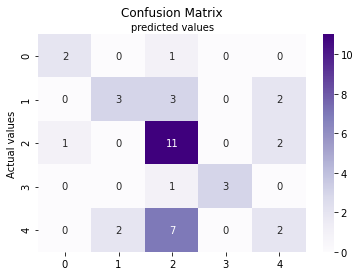

In [15]:
##plot for confusion matrix:

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(c_matrix),annot = True,cmap = "Purples",fmt = 'g')
ax.xaxis.set_label_position("top")
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix")
plt.show()